# Streaming OTT  Subscription

For this analysis, we'll be examining customer churn data from a leading subscription-based streaming service. This industry giant boasts a vast library of movies, TV shows, and original content. Understanding why customers discontinue their subscriptions will be crucial in optimizing the user experience, reducing churn, and maximizing customer lifetime value.

## About the Data

| Feature                  | Description                                            |
|--------------------------|--------------------------------------------------------|
| CustomerID               | Unique identifier for each customer                    |
| SubscriptionType         | Type of subscription plan chosen by the customer      |
| PaymentMethod            | Method used for payment                                |
| PaperlessBilling         | Whether the customer uses paperless billing            |
| ContentType              | Type of content accessed by the customer               |
| MultiDeviceAccess        | Whether the customer has access on multiple devices   |
| DeviceRegistered         | Device registered by the customer                      |
| GenrePreference          | Genre preference of the customer                       |
| Gender                   | Gender of the customer                                 |
| ParentalControl          | Whether parental control is enabled                    |
| SubtitlesEnabled         | Whether subtitles are enabled                          |
| AccountAge               | Age of the customer's subscription account (in months) |
| MonthlyCharges           | Monthly subscription charges                           |
| TotalCharges             | Total charges incurred by the customer                 |
| ViewingHoursPerWeek      | Average number of viewing hours per week               |
| SupportTicketsPerMonth   | Number of customer support tickets raised per month    |
| AverageViewingDuration   | Average duration of each viewing session               |
| ContentDownloadsPerMonth | Number of content downloads per month                  |
| UserRating               | Customer satisfaction rating (1 to 5)                  |
| WatchlistSize            | Size of the customer's content watchlist               |
| Churn                    | Situation of customer churn or not (target variable)    |


### Data Feature category

| Category   | Feature                  |
|------------|--------------------------|
| Numerical  | AccountAge               |
|            | MonthlyCharges           |
|            | TotalCharges             |
|            | ViewingHoursPerWeek      |
|            | AverageViewingDuration   |
|            | ContentDownloadsPerMonth |
|            | UserRating               |
|            | SupportTicketsPerMonth   |
|            | WatchlistSize            |
|            | Churn                    |
| Categorical| SubscriptionType         |
|            | PaymentMethod            |
|            | PaperlessBilling         |
|            | ContentType              |
|            | MultiDeviceAccess        |
|            | DeviceRegistered         |
|            | GenrePreference          |
|            | Gender                   |
|            | ParentalControl          |
|            | SubtitlesEnabled         |


# Objective

- Reason for Churning customers.

# Improting Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',25)
plt.style.use('ggplot')

### Load the Data

In [2]:
df = pd.read_csv('ott_subscription.csv')

In [3]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0.0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0.0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0.0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0.0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0.0


# Data Preprocessing and Feature Enginerring

In [4]:
df['MonthlyCharges'] = df['MonthlyCharges'].apply(lambda x:round(x,2))

In [5]:
df.drop('CustomerID',axis = 1, inplace = True)

In [6]:
df.dropna(inplace = True)

# Exploration

## Statistics

### Numerical Features

In [7]:
df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490687,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327613,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990000,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.740000,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.500000,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.240000,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.990000,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


### Categorical Features

In [8]:
df.select_dtypes(include = 'object').describe()

,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,GenrePreference,Gender,ParentalControl,SubtitlesEnabled
count,243787,243787,243787,243787,243787,243787,243787,243787,243787,243787
unique,3,4,2,3,2,4,5,2,2,2
top,Standard,Electronic check,No,Both,No,Computer,Comedy,Female,Yes,Yes
freq,81920,61313,121980,81737,122035,61147,49060,121930,122085,122180


## Analysis

In [9]:
def uni_plot(df,col, h_bins = 15, h_hue = None, k_fill = None):
    fig, ax = plt.subplots(1,3,figsize=(18,6))
    sns.histplot(data = df, x = col, bins = h_bins, ax = ax[0],hue=h_hue)
    ax[0].set_title(f"Histogram of {col}")
    sns.boxplot(data = df, x = col, ax = ax[1])
    ax[1].set_title(f"Boxplot of {col}")
    sns.kdeplot(data = df, x = col, ax = ax[2], fill=k_fill)
    ax[2].set_title(f"KDE of {col}")
    plt.suptitle(f"Distribution of {col}", fontsize = 15)
    plt.tight_layout()
    plt.show()

### Churn Rate

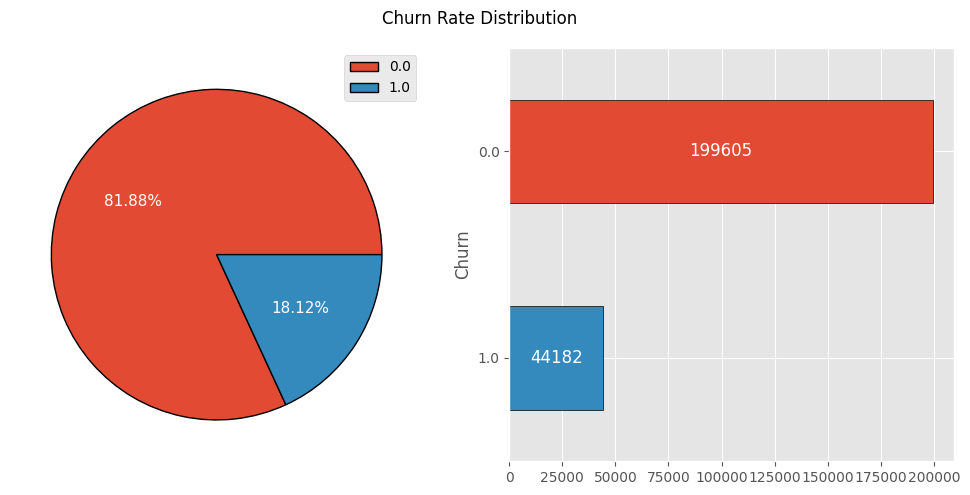

In [10]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
df['Churn'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%',textprops={'color': 'white', 'fontsize': 11}, ax = ax[0], wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, 
                      'antialiased': True})
ax_t = df['Churn'].value_counts(ascending = True).plot(kind = 'barh', ax = ax[1], color = ['#348ABD','#E24A33'],edgecolor = 'black')
for c in ax_t.containers:
    ax_t.bar_label(c, label_type='center', fontsize = 12, color = 'white')
ax[0].legend()
ax[0].set_ylabel('')
plt.suptitle('Churn Rate Distribution')
plt.tight_layout(h_pad=False)
plt.show()

- Not Churned Customer - 81.88%
- Churned Customer - 18.12%

### Churn by Gender

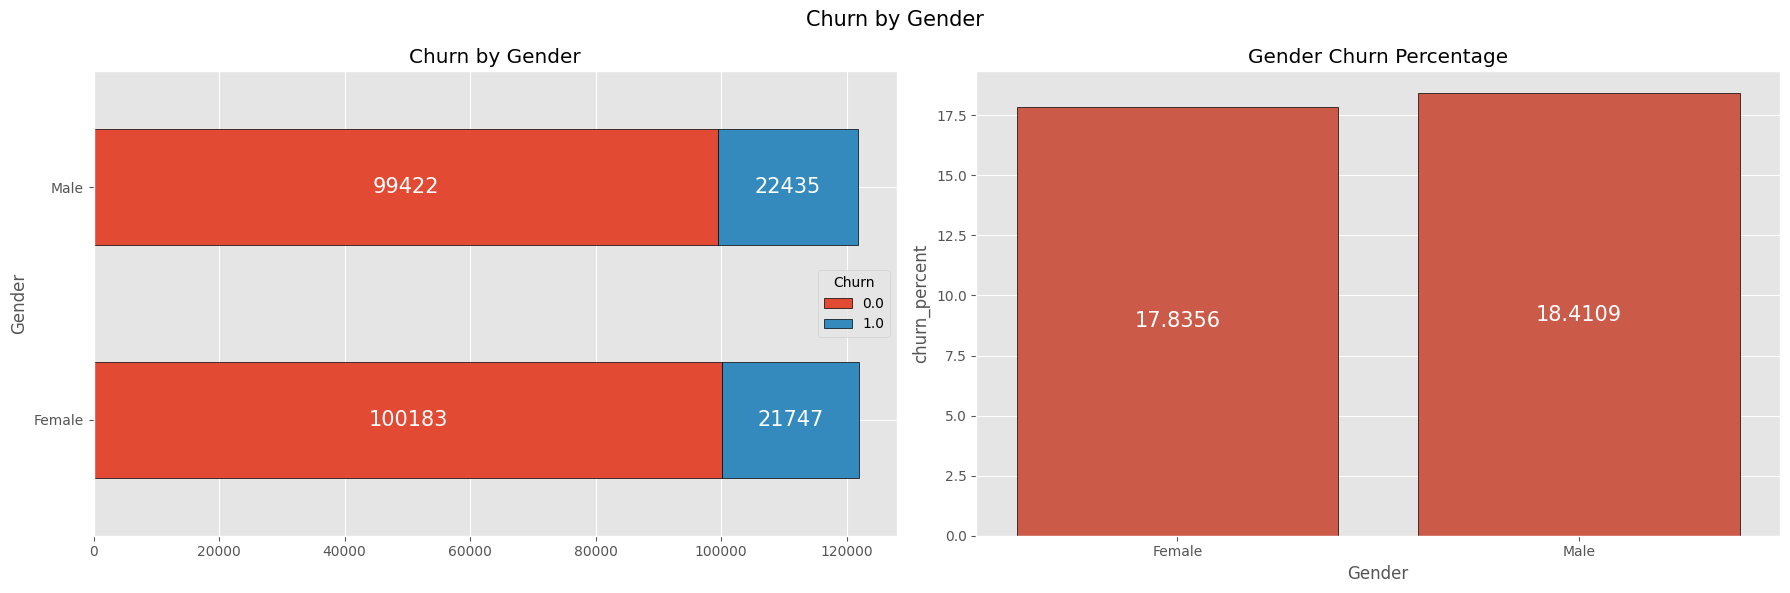

In [11]:
churn_gender = df.groupby(['Gender','Churn']).size().unstack()
percent_gender = churn_gender.copy()
percent_gender['sum']=percent_gender.sum(axis = 1)
percent_gender['churn_percent'] = (percent_gender[1.0]/percent_gender['sum'])*100

#plot
fig, ax = plt.subplots(1,2, figsize = (18,6))
ax[0] = churn_gender.plot(kind = 'barh', stacked = True, ax = ax[0],edgecolor = 'black')
for i in ax[0].containers:
    ax[0].bar_label(i, label_type = 'center', fontsize = 15, color = 'white')
ax[0].set_title('Churn by Gender')    
sns.barplot(data = percent_gender, x = percent_gender.index, y = 'churn_percent',ax=ax[1],edgecolor = 'black')
for i in ax[1].containers:
    ax[1].bar_label(i, label_type = 'center', fontsize = 15, color = 'white')
ax[1].set_title('Gender Churn Percentage')
plt.suptitle('Churn by Gender', fontsize = 15)
plt.tight_layout()
plt.show()

- **Churn and Gender**-
    Among our users, there are more females than males. However, the churn rate for male users is slightly higher than the churn rate for female users.

### Account Age

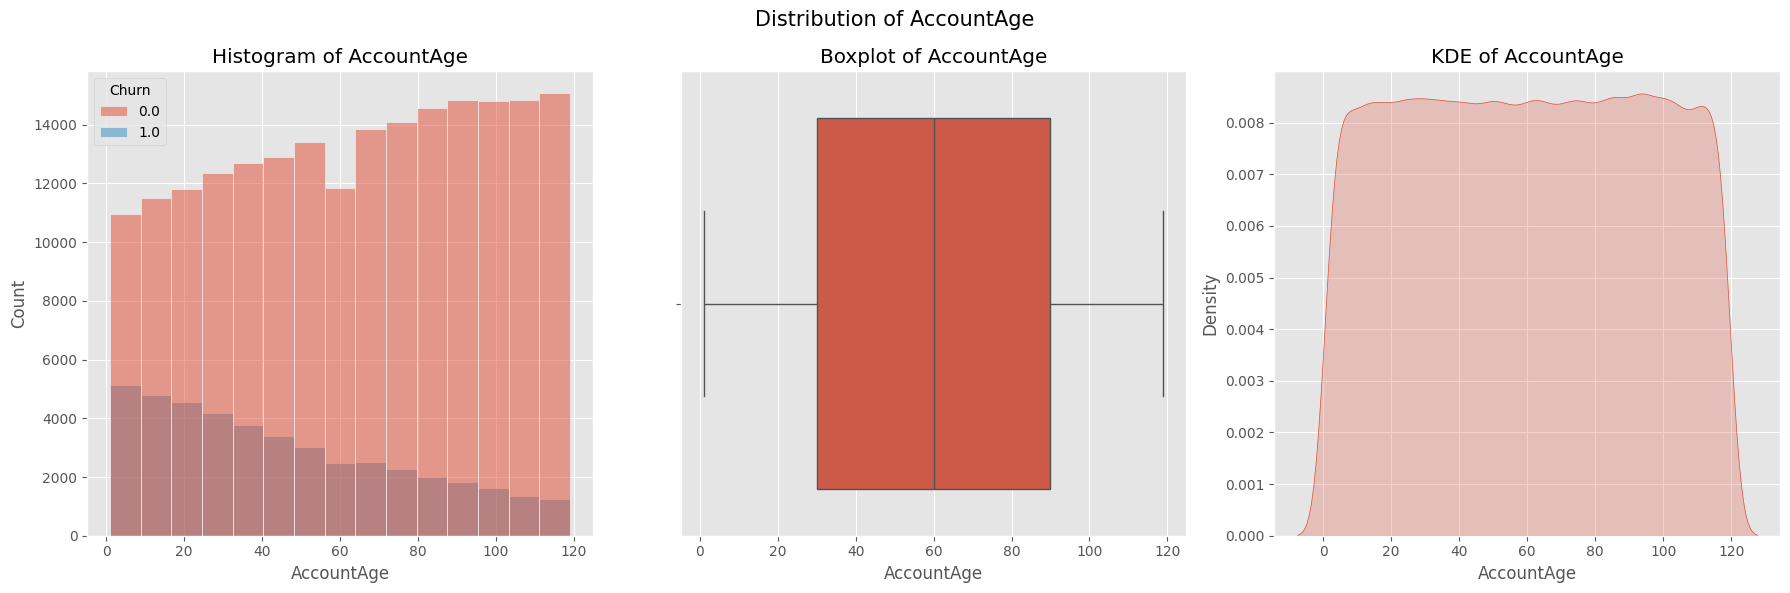

In [12]:
uni_plot(df,'AccountAge', h_hue='Churn', k_fill=True)

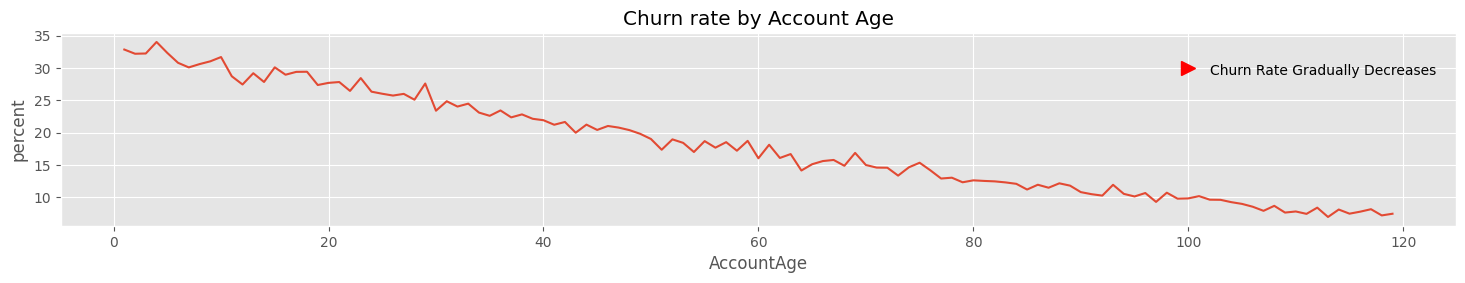

In [13]:
age = df.groupby(['AccountAge','Churn'], as_index = False).size()
age['AccountAge'] = age['AccountAge'].astype('object')
total_ = age.groupby('AccountAge', as_index=False)['size'].sum()
total_.rename(columns = {'size':'total'}, inplace = True)
age = age.merge(total_, on = 'AccountAge')
age.loc[age['Churn'] == 1, 'percent'] = round((age['size'] / age['total']) * 100,2)
age = age[age['Churn']==1]
plt.figure(figsize=(18,2.5))
ax = sns.lineplot(data = age, x = age['AccountAge'], y = 'percent')
ax.plot(100,30, ">", markersize=10, color="r")
ax.text(102,29,'Churn Rate Gradually Decreases')
plt.title('Churn rate by Account Age')
plt.show()

1. **User Age and Churn:**
   - Older users are more prevalent than new users.
   - Churn tends to be higher among accounts with lower age (newer users).
   - As account age increases, the churn rate decreases.

2. **Account Age Statistics:**
   - Median account age: 60 months
   - Highest account age: 120 months

3. **Churn Rates:**
   - Churn rate for new users (low account age): ~32%
   - Churn rate decreases to ~7% as account age increases.

### Total Monthly Charges

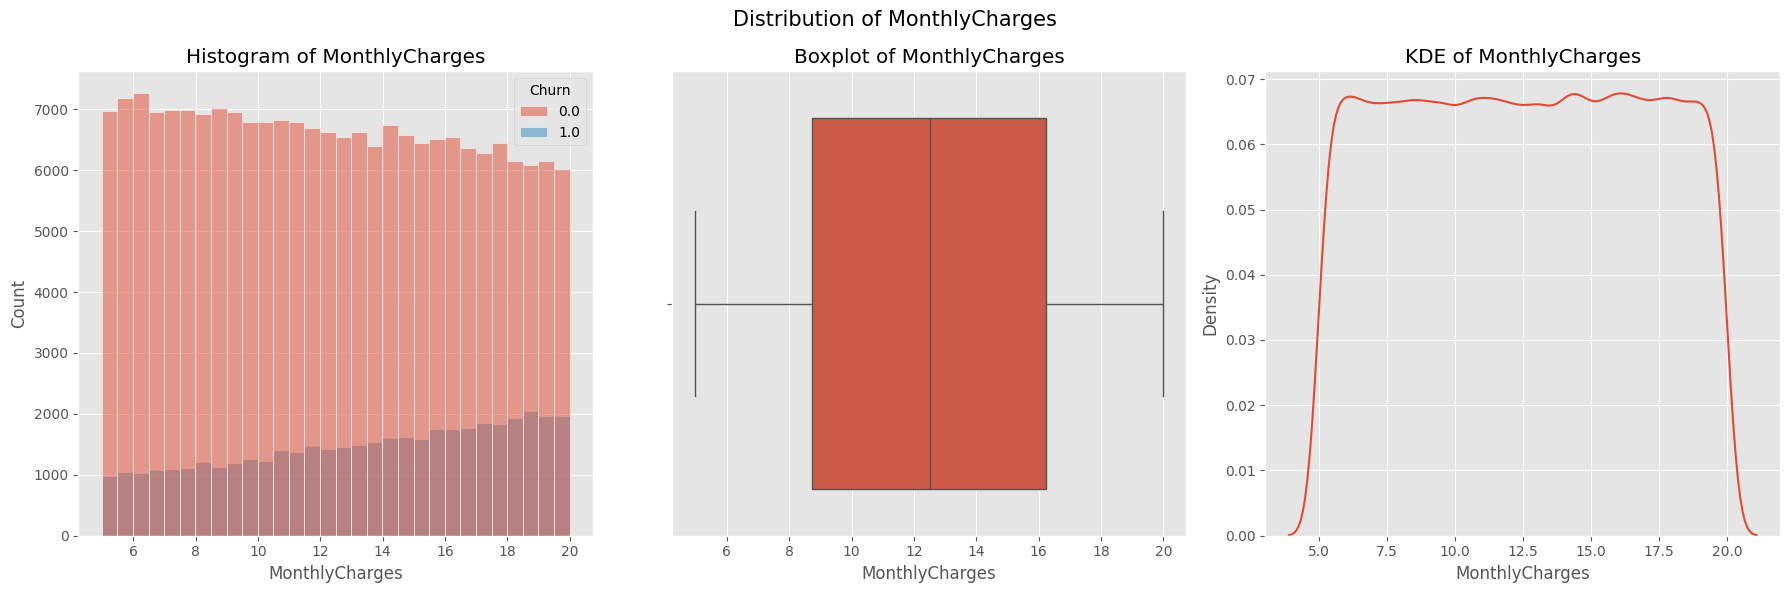

In [14]:
uni_plot(df,'MonthlyCharges', h_bins=30,h_hue='Churn')

1. **Churn and Monthly Charges:**
   - Churn rates tend to increase as monthly charges increase. Users with higher monthly charges are more likely to churn.
   - Low churn occurs when monthly charges are low.

2. **Subscription Distribution:**
   - There's a relatively high number of low monthly subscriptions, gradually decreasing toward higher subscription tiers.

3. **Monthly Charge Statistics:**
   - Minimum monthly price: 4.99
   - Maximum monthly price: 19.99

### Viewing Hours Per Week

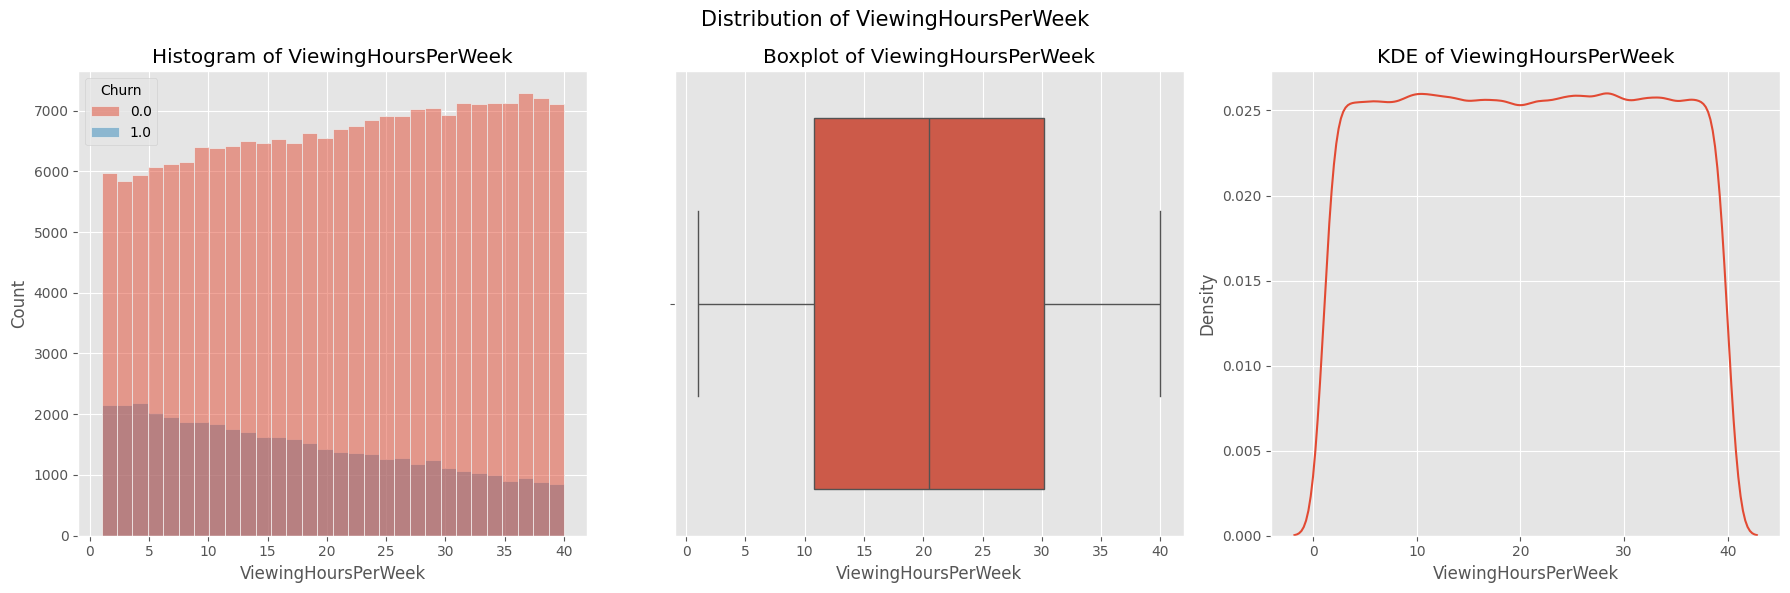

In [15]:
uni_plot(df,'ViewingHoursPerWeek', h_bins=30, h_hue='Churn')

1. **Churn and Viewing Hours:**
   - Users with higher weekly viewing hours are less likely to churn compared to those with lower viewing hours.
   - High churn occurs among users who view less than or equal to four hours.
   - Users with viewing hours between 30 and 40 exhibit relatively stable churn.

2. **Viewing Hours Statistics:**
   - Average weekly view hours: 20.5
   - Minimum weekly view hours: 1
   - Maximum weekly view hours: 40

### Average Viewing Duration

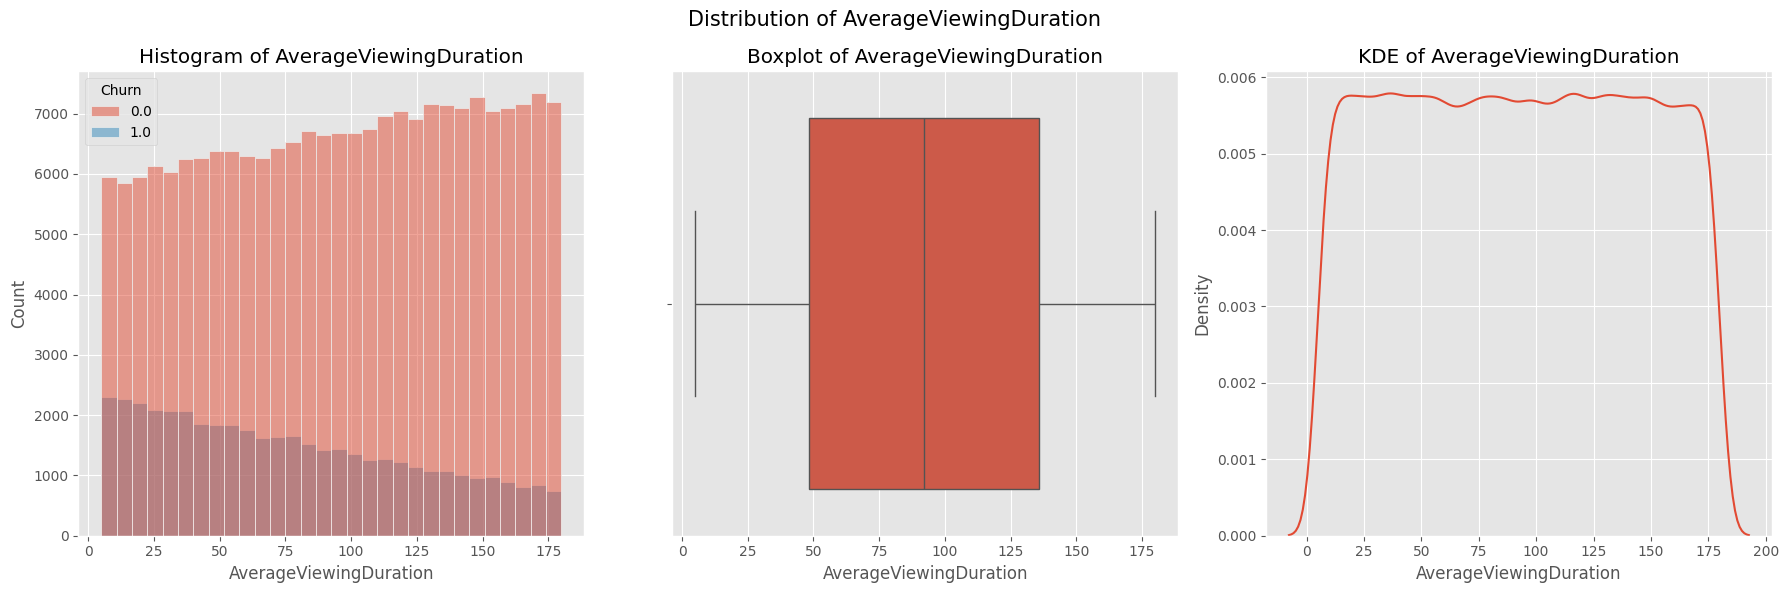

In [16]:
uni_plot(df, 'AverageViewingDuration', h_bins=30, h_hue='Churn')

1. **Churn and Average View Duration:**
   
   - Users which have the low average view duration are more likely to churn than the users which have high average duration.
   - High churn occurs when the average view duration upto 40.
   - there is gradually decrease in churn rate from 50
   - Users with viewing hours between 125 and 175 exhibit relatively stable churn.
    
2. **Average view Duration Statistics :**

   - Minimum is 5.
   - Maximum is 179.99
   - Average is 92.37.

### Content Downloads Per Month

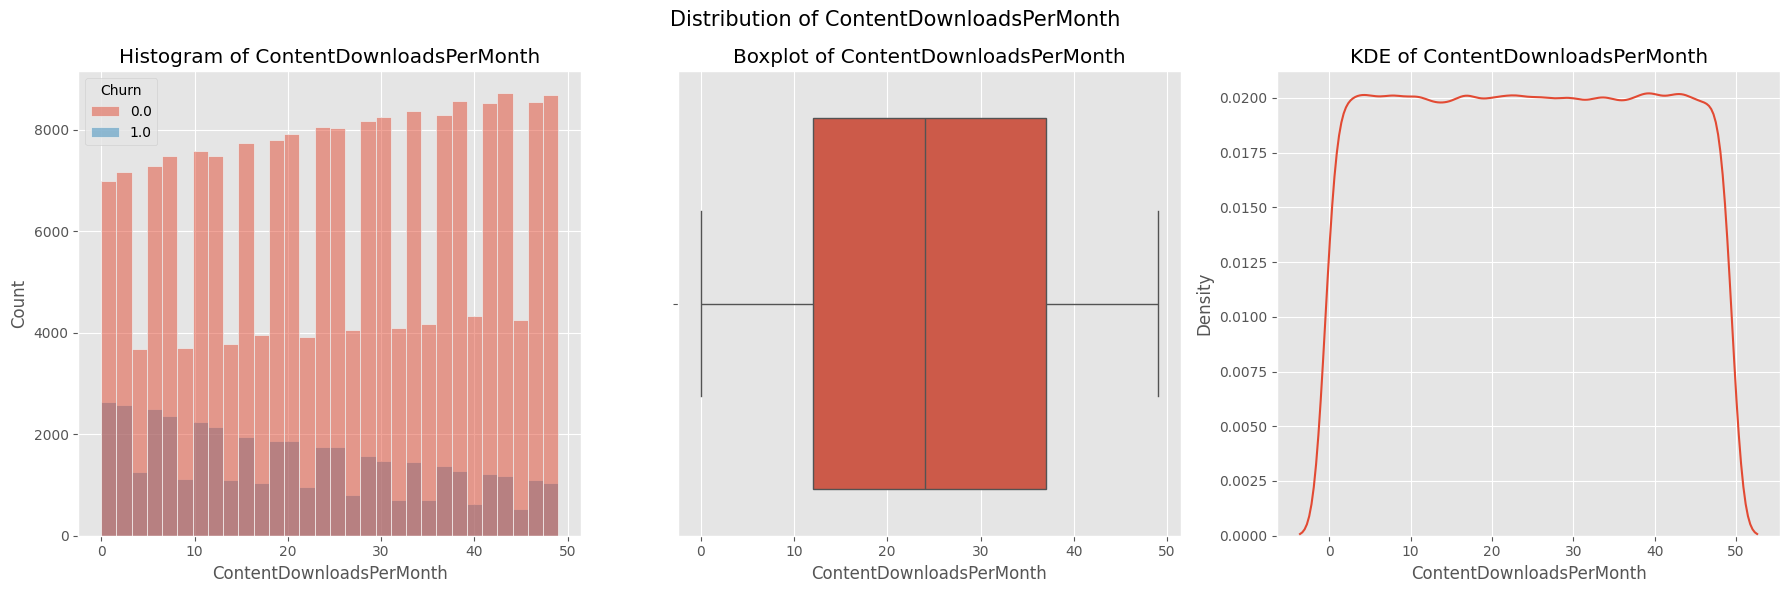

In [17]:
uni_plot(df, 'ContentDownloadsPerMonth', h_hue='Churn', h_bins=30)

1. **Churn and Content Downloads Per Month:**
   - Users with high Content Downloads Per Month are more likely to churn compared to users with low Content Downloads Per Month.
   - The sudden drop of up to 50% in some bars indicates that people download new series and shows when they are released.
   - Users with high download activity likely subscribe to download new content.
   - High churn occurs when the download count exceeds 10.
   - There is a decrease in churn rate as the download count decreases.
   - Users with download counts between 30 and 50 exhibit relatively stable churn behavior.
   - Some users do not download shows or movies, possibly due to device limitations or a preference for watching on TV.

2. **Average View Duration Statistics:**
   - Minimum view duration is 0.
   - Maximum view duration is 49.
   - The average view duration across users is 24.48.

### User Rating

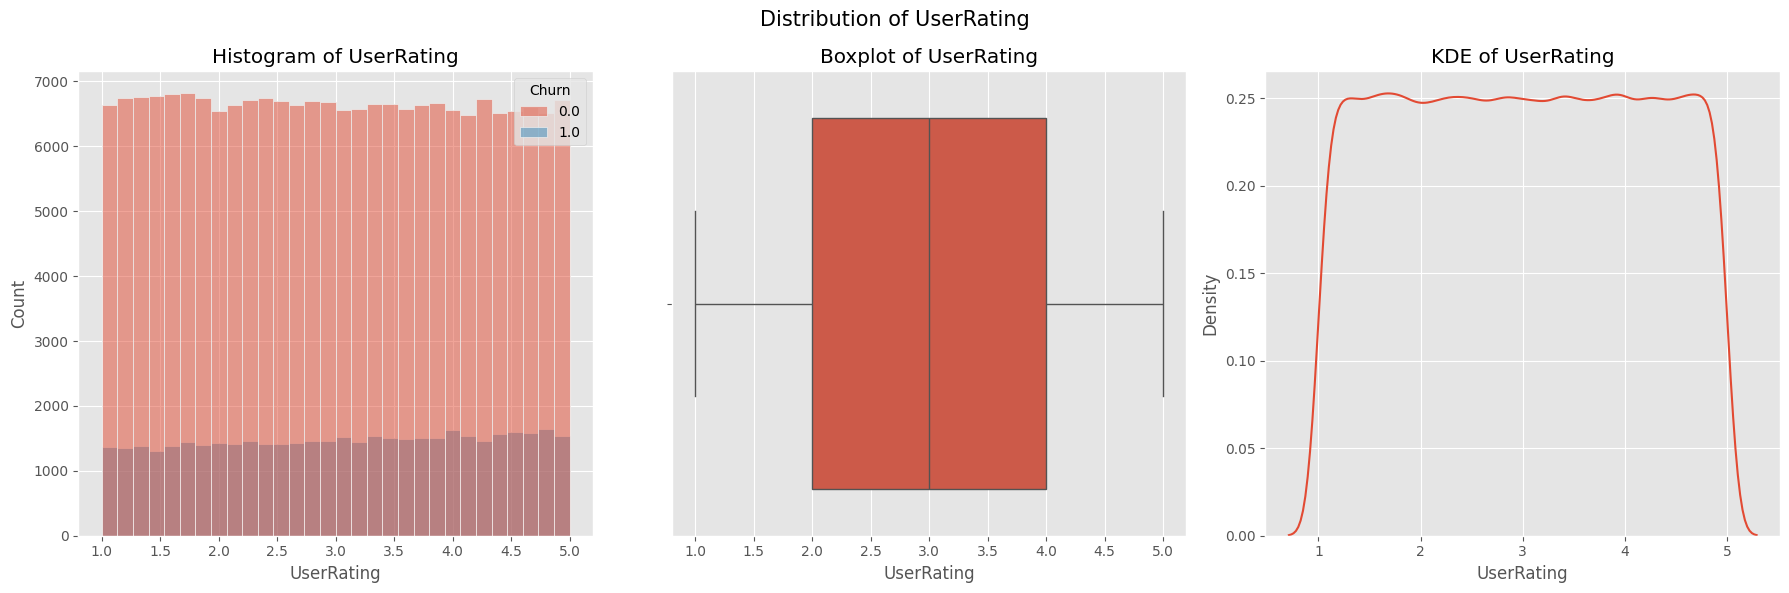

In [18]:
uni_plot(df, 'UserRating', h_bins=30, h_hue='Churn')

1. **Churn and User Rating:**
   
   - There is no relationship between rating and churn because rating 1 to 5 there is relatively stable churn.
   - OTT streaming get relatively equal ratings.
    
2. **User Rating Statistics :**

   - Minimum is 1.
   - Maximum is 4.99
   - Average is 3.002.

### Support Ticket Per month

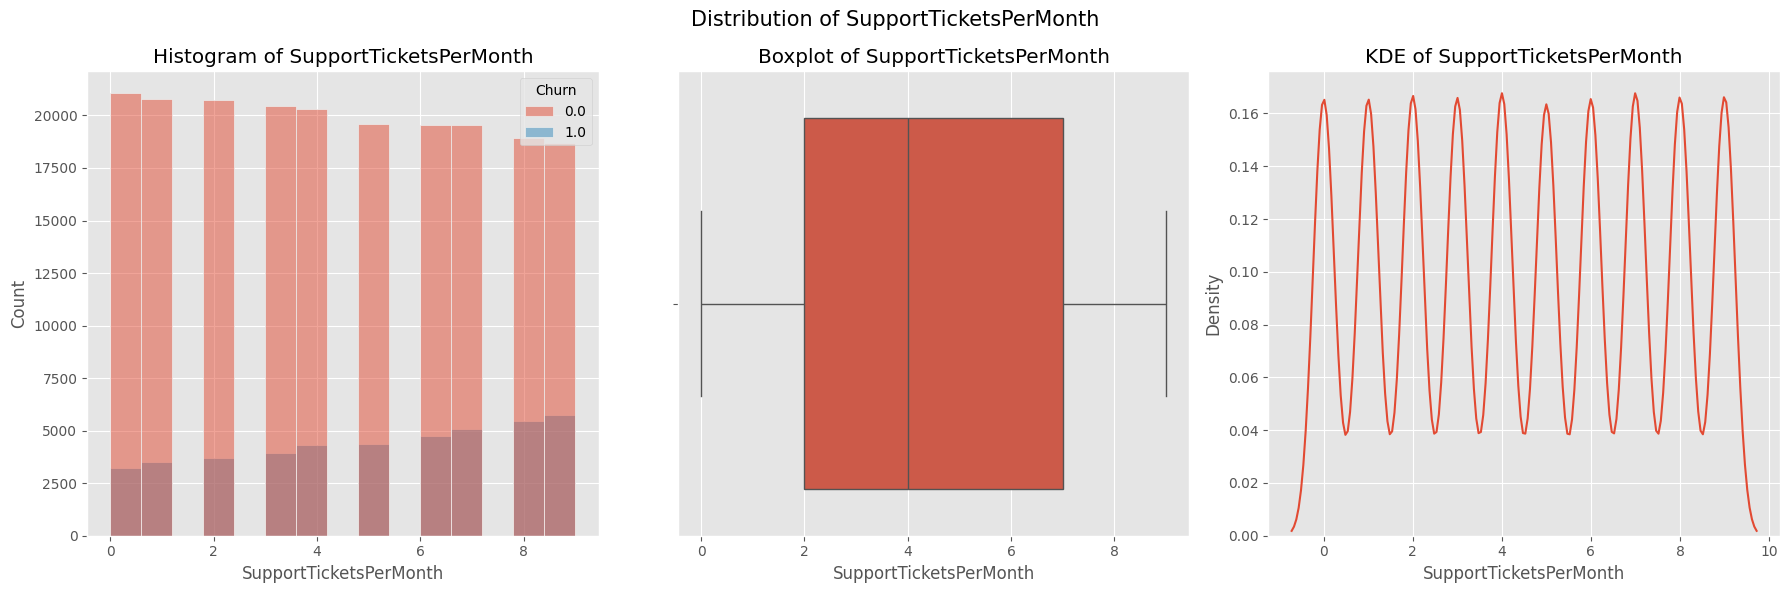

In [19]:
uni_plot(df,'SupportTicketsPerMonth', h_bins=15,h_hue='Churn')

1. **Churn and Support Ticket:**
   
   - From the illustration, it shows that the higher the ticket generate, the users most likely to churn
- there is significantly low churn rate when there is no ticket generated. but when the ticket generated it also increaes the churn rate. 
   - Most churn rate are when the ticket generated 6 to 8.
    
2. **Support Ticket Statistics :**

   - Minimum is 0.
   - Maximum is 9.99
   - Average is 4.5.002.

### Watch List Size

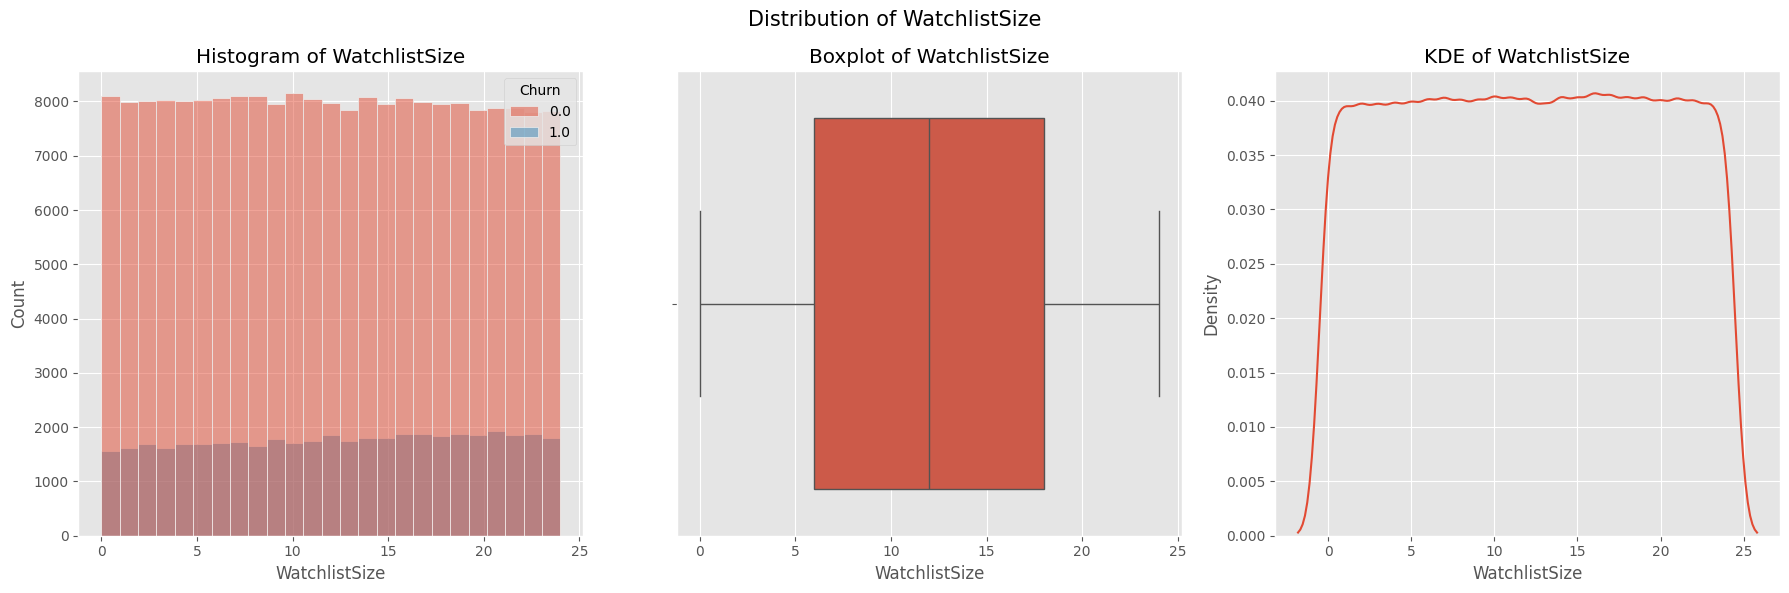

In [20]:
uni_plot(df,'WatchlistSize',h_bins=25, h_hue='Churn')

1. **Churn and Watch List Size:**
   
   - There is no relationship between Watchlist and churn because there is relatively stable churn.
    
2. **User Rating Statistics :**

   - Minimum is 0.
   - Maximum is 24.99
   - Average is 12.02.

### Churn by Subscription

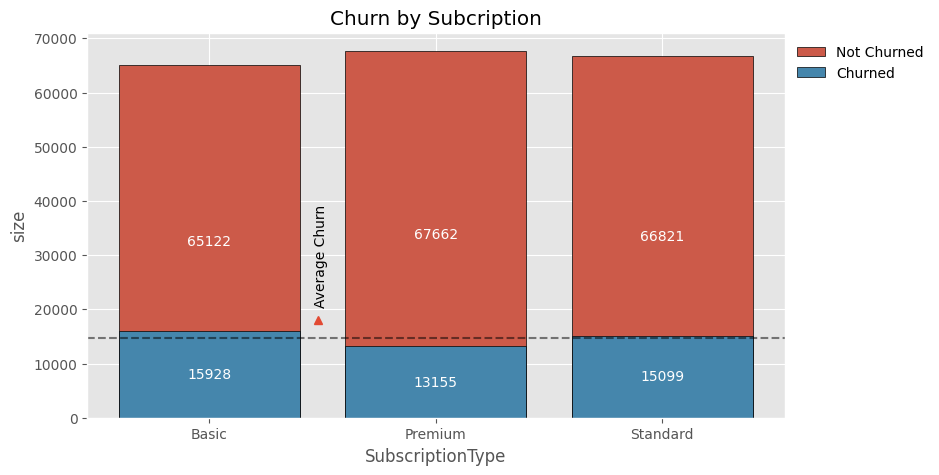

In [21]:
subs_ = df.groupby(['SubscriptionType','Churn'], as_index=False).size()
subs1 = subs_[subs_['Churn']==0]
subs2 = subs_[subs_['Churn']==1]
plt.figure(figsize = (9,5))
ax = sns.barplot(data = subs1, x = 'SubscriptionType', y = 'size',errorbar=None, label = 'Not Churned', edgecolor = 'black')
ax1 = sns.barplot(data = subs2, x = 'SubscriptionType', y = 'size',errorbar=None,ax = ax, label = 'Churned',edgecolor = 'black')
ax1.axhline(subs2['size'].mean(), color = 'black', linestyle = '--', alpha = 0.5)
ax1.plot(0.478,18000,marker='^')
ax1.text(0.460,21000,'Average Churn', rotation = 'vertical', mouseover = True)
for i in ax1.containers:
    ax1.bar_label(i, label_type = 'center', color = 'white')
plt.title('Churn by Subcription')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), frameon=False)
plt.grid(True)
plt.show()

1. **Churn Rate by Subscription Type**:
   - The churn rate is highest among Basic subscribers, followed by Standard and Premium.
   - Specifically, users who subscribe to the Basic plan tend to have a higher churn rate.

2. **Premium Subscribers**:
   - Premium subscribers exhibit the lowest churn rate across all subscription types.
   - This suggests that Premium subscribers are more likely to stay with the service.

3. **User Preferences**:
   - Most users prefer the Premium subscription, followed by Standard and then Basic.


### Payment Method and Paperless Billing

In [22]:
billing = df.groupby(['PaymentMethod','PaperlessBilling','Churn'], as_index=False).size()
billing = billing.pivot_table(index = 'PaymentMethod', columns = ['PaperlessBilling','Churn'], values='size')

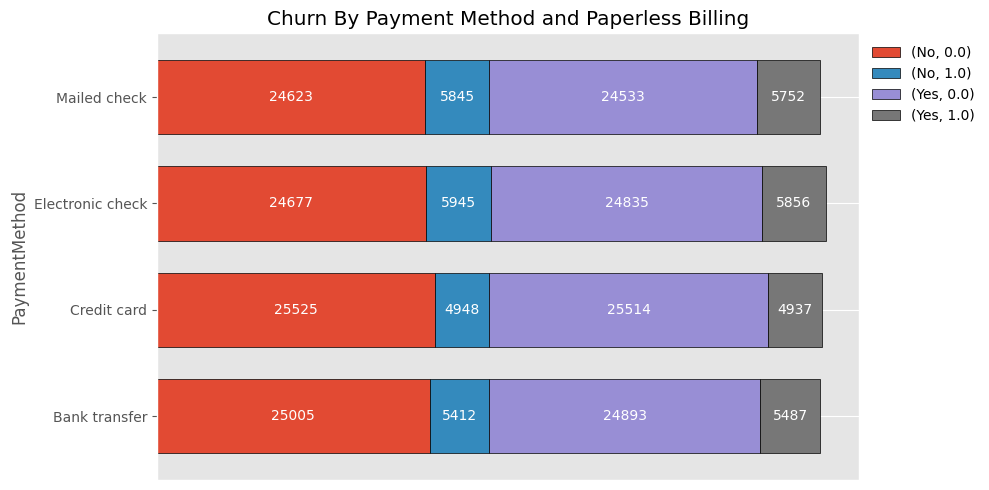

In [23]:
ax = billing.plot(kind='barh', stacked=True, figsize=(10, 5), width = 0.7, edgecolor = 'black')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), frameon=False)
for c in ax.containers:
    ax.bar_label(c, label_type='center', color = 'white')
plt.title('Churn By Payment Method and Paperless Billing')
plt.xlabel('')
plt.xticks([])
plt.grid(True)
plt.tight_layout()
plt.show()

1. **Churn and Payment Method:**
   
    - from this illustration, Users with electronic check have the higher churn rate followed by mail check  and bank transfer and credit.
    - Paperless billing affecting the churn rate is relatively very low.
3. **Overall Insights:**

    - users with Payment method which takes time and effort have thr highest churn rate as compared to the payment method that require less effort.

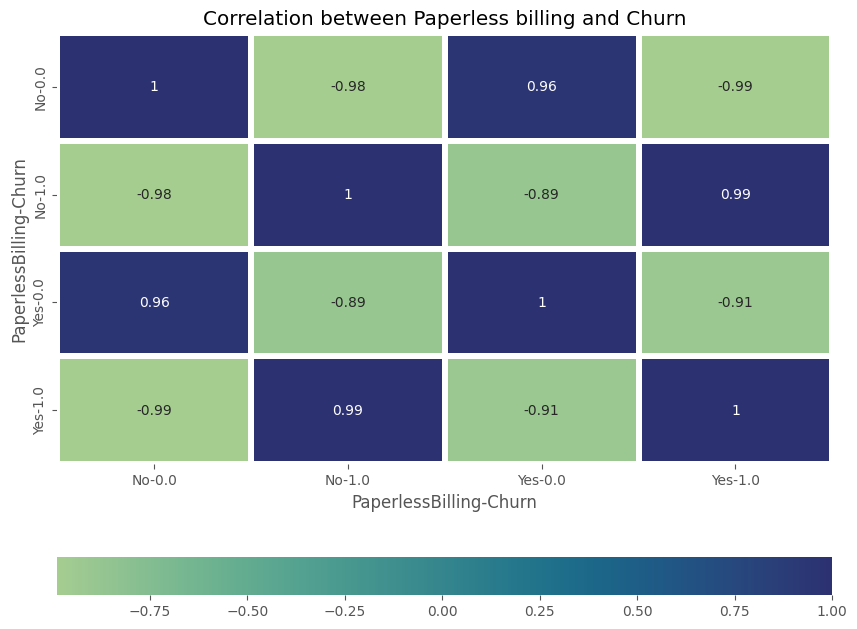

In [24]:
plt.figure(figsize = (10,8))
sns.heatmap(billing.corr(), annot = True, linecolor='white', linewidths=3,cbar_kws={'orientation': 'horizontal'}, cmap="crest")
plt.title('Correlation between Paperless billing and Churn')
plt.show()

1. **Churn and Paperless Billing**:
   - The diagonal represents the correlation of each variable with itself (which is always 1.0).
   - The off-diagonal values represent the correlation between `Churn` and `PaperlessBilling`.
   - When `PaperlessBilling` is `No`, the correlation with `Churn` is approximately -0.98, indicating a strong negative relationship. Customers who are not on paperless billing tend to have lower churn rates.
   - Conversely, when `PaperlessBilling` is `Yes`, the correlation with `Churn` is around -0.91. This suggests that customers on paperless billing have a slightly higher churn rate.

2. **Overall Insights**:
   - Paperless billing appears to be an important factor affecting churn behavior.
   - Customers who prefer paperless billing are more likely to churn.
   - As a data analyst, you might want to explore this relationship further and consider it in your churn prediction models.

### Content Type with Churn

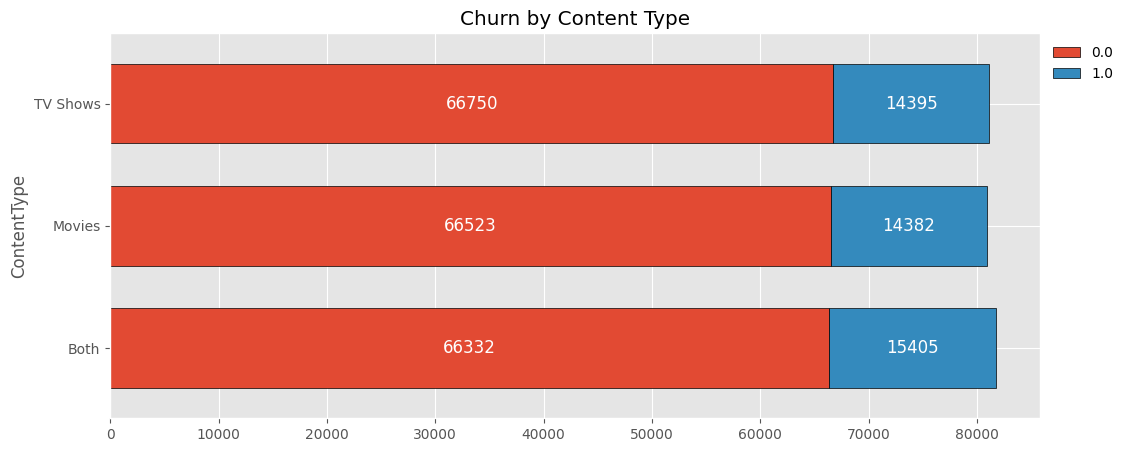

In [25]:
content = df.groupby(['ContentType','Churn']).size().unstack()
ax = content.plot(kind = 'barh',stacked = True, width=0.65, figsize = (12,5),edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i, label_type = 'center', fontsize = 12, color = 'white')
ax.set_title('Churn by Content Type')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), frameon=False)
plt.show()

- **Churn and Content type**:
    - Movie content have the lowest churn rate followed by Tv shows and both.
    - User who have subscribe both have the high churn rate.

### Churn by Genre

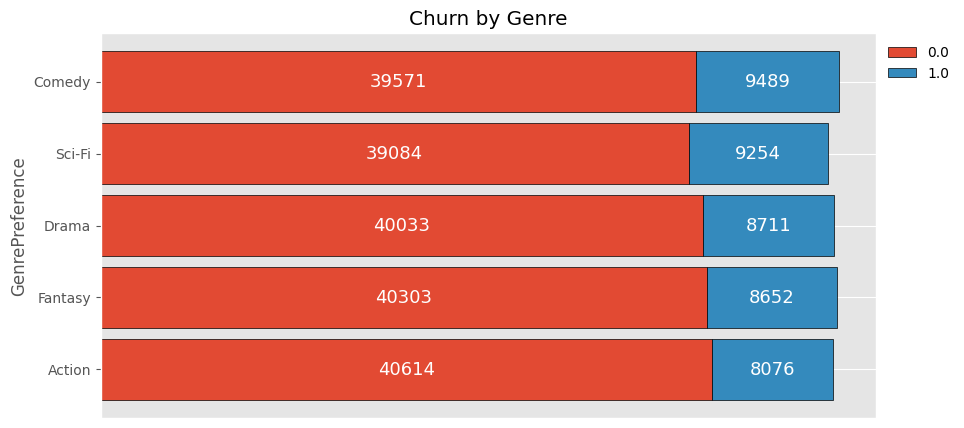

In [26]:
genre = df.groupby(['GenrePreference','Churn']
                  ).size().unstack().sort_values(by = 1.0, ascending = True)
#plot
ax = genre.plot(kind = 'barh', stacked = True, width = 0.85, figsize = (10,5),edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i, label_type = 'center', fontsize = 13, color = 'white')
plt.title('Churn by Genre')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), frameon=False)
plt.xticks([])
plt.show()

- **Churn and Genre**:
    - Comedy have the high churn rate followed by the SCI-Fi, drama, fantasy and action have the lowest churn rate
    - Most users preferred the comedy genere followed by fantasy, drama,action and SCi-fi.

### Churn by Parental Control and Subtitle Enables

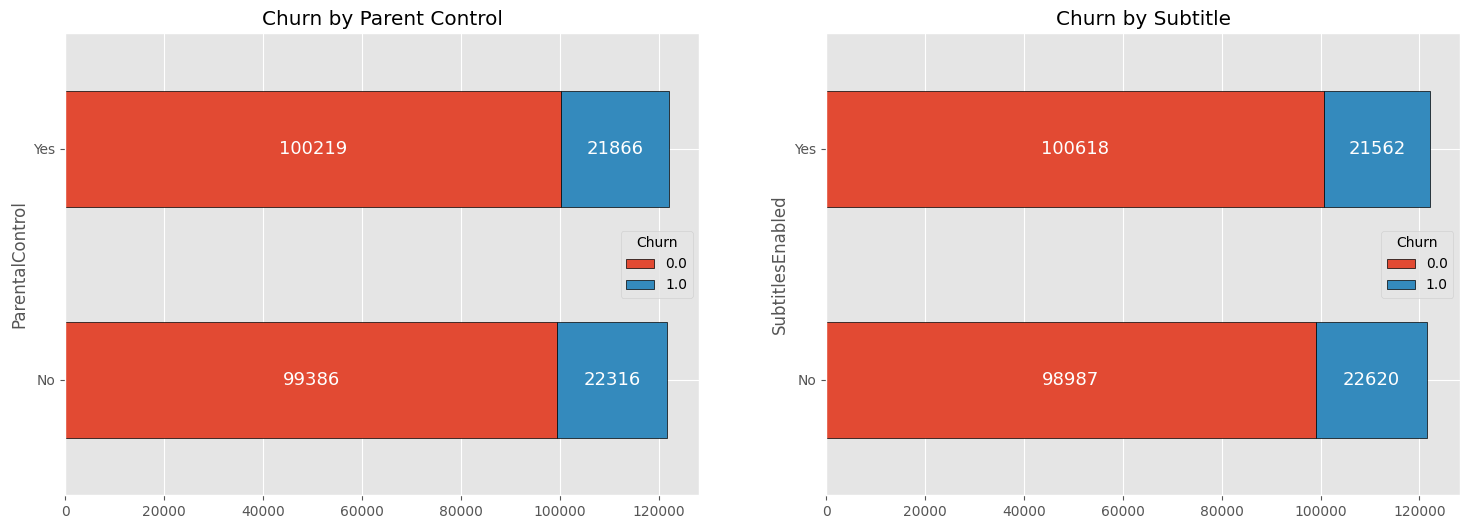

In [27]:
parent = df.groupby(['ParentalControl','Churn']).size().unstack()
subtitle = df.groupby(['SubtitlesEnabled','Churn']).size().unstack()

#plot
fig, ax = plt.subplots(1,2,figsize = (18,6))
#plot 1
parent.plot(kind = 'barh', stacked = True, edgecolor = 'black', ax = ax[0])
ax[0].set_title('Churn by Parent Control')
for i in ax[0].containers:
    ax[0].bar_label(i, label_type = 'center', color = 'white', fontsize = 13)
#plot2
subtitle.plot(kind = 'barh', stacked = True, edgecolor = 'black', ax = ax[1])
ax[1].set_title('Churn by Subtitle')
for i in ax[1].containers:
    ax[1].bar_label(i, label_type = 'center', color = 'white', fontsize = 13)
plt.show()

- High churn rate in No parental control and no subtitle enabled.
- There is high number of users which have parent control and subtitle enabled. 

### Correlation with Churn

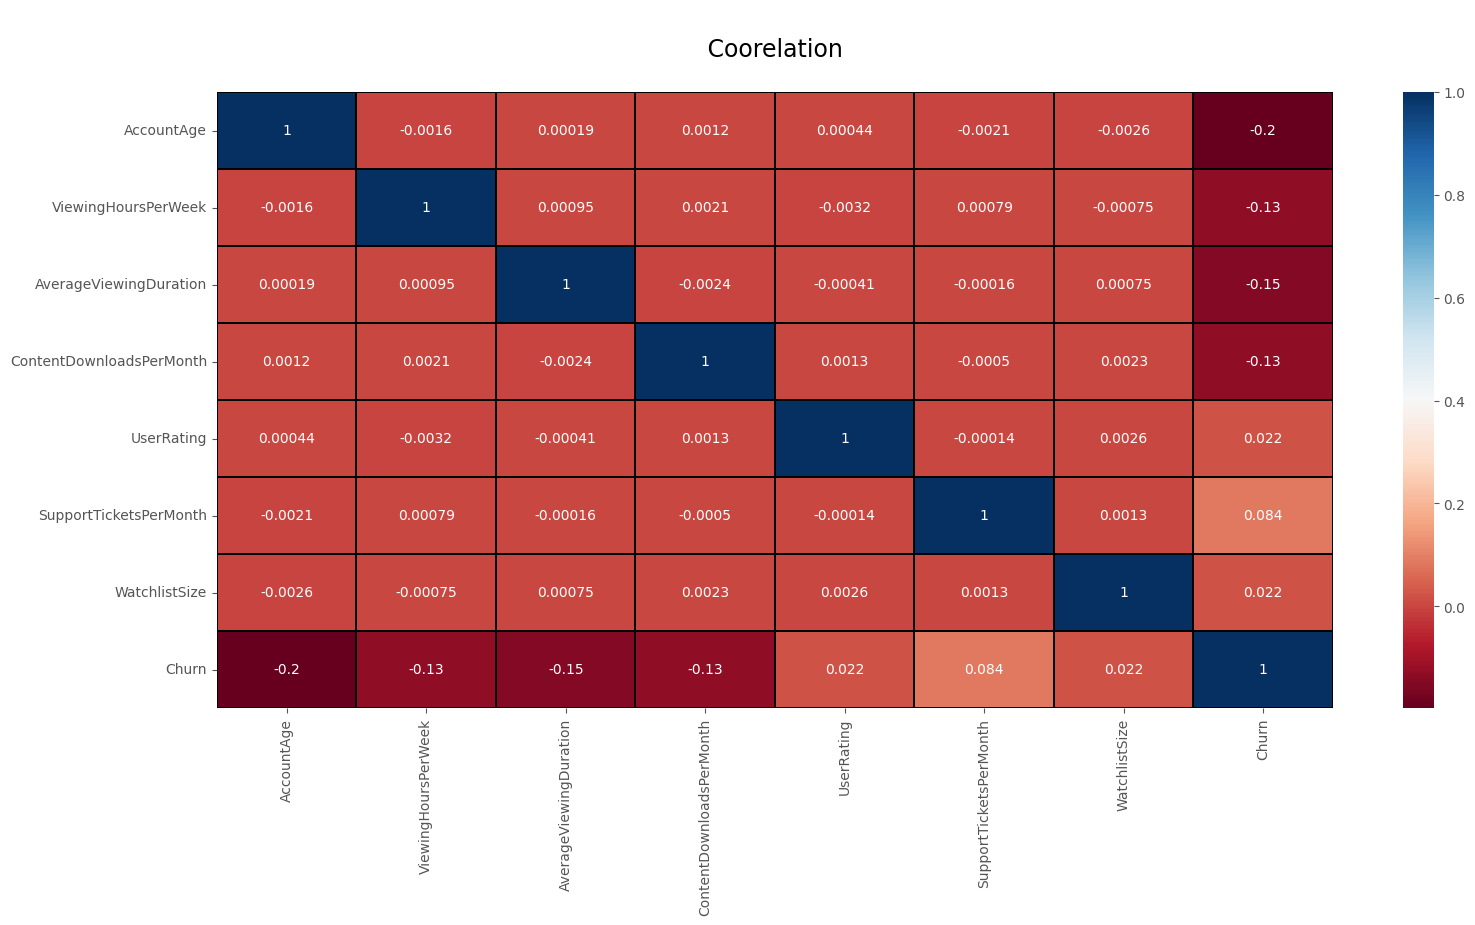

In [28]:
corr_ = df[['AccountAge', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize', 'Churn']].corr()
plt.figure(figsize = (18,8))
sns.heatmap(corr_, annot = True, cmap = 'RdBu', cbar = True, linecolor='black', linewidths=1.1)
plt.title('\n Coorelation \n', fontsize = 17)
#plt.tight_layout()
plt.show()

1. Churn has a **negative correlation** with the following features:
   - `AccountAge`
   - `Viewinghoursperweek`
   - `Averageviewduration`
   - `Contentdownloadpermonth`
   
   This implies that as these features increase, churn tends to **decrease**.

2. On the other hand, churn has a **positive correlation** with the following features:
   - `Supportticketpermonth`
   - `userrating`
   - `watchlistsize`
   
   This suggests that as these features increase, churn tends to **increase**.

## Conclusion



1. **Paperless Billing**:
   - Customers who are not on paperless billing tend to have lower churn rates (correlation of approximately -0.98).
   - However, customers on paperless billing still exhibit a slightly higher churn rate (correlation of around -0.91).
   - **Insight**: Paperless billing significantly impacts churn behavior, and customers who prefer paperless billing are more likely to churn.

2. **Content Type**:
   - Movie content has the lowest churn rate, followed by TV shows and both.
   - Users who subscribe to both movie and TV show content have a higher churn rate.
   - **Insight**: Consider tailoring content recommendations based on user preferences to reduce churn.

3. **Genre Preferences**:
   - Comedy content has the highest churn rate, while genres like Sci-Fi, drama, fantasy, and action have lower churn rates.
   - Most users prefer comedy, followed by fantasy, drama, action, and Sci-Fi.
   - **Insight**: Personalizing content offerings based on genre preferences can improve retention.

4. **Parental Control and Subtitles**:
   - High churn occurs among users with no parental control and no subtitle enabled.
   - Many users have both parental control and subtitles enabled.
   - **Insight**: Enhancing parental control features and ensuring subtitle availability may positively impact retention.

5. **Correlations**:
   - Negative correlations:
     - AccountAge, Viewinghoursperweek, Averageviewduration, and Contentdownloadpermonth are associated with lower churn rates.
   - Positive correlations:
     - Supportticketpermonth, userrating, and watchlistsize are associated with higher churn rates.
   - **Insight**: These correlations can guide targeted strategies to reduce churn (e.g., improving customer support or enhancing content recommendations).
